# Modeling Distributions and RNGs

So, last week we learned about PMFs, PDFs, CDFs and all that. This week we're going to learn how to *use* the relationship between CDFs and PDFs to transform a "random number generator" (RNG) from one distribution to another. It's cool! Let's review the general properties of a CDF to get things started.

A CDF for a random variable $t$ is defined as:

$$\text{CDF(t) = Probability (random var is between $-\infty$ and $t$)} = \int_{-\infty}^{t} P(t')\,dt'$$

In other words it's the probability that the random variable is measured with a value less than $t$.

The domain of the CFD is $-\infty$ to $\infty$ and the range is between 0 and 1, since the value of the function is a probability. This means that *any* possible value of the random variable can be used as an argument, and the result will *always* be a probability between 0 and 1. Let's take a concrete example, like the one we used last week:

$$ PDF(t) = \frac{1}{\tau} e^{-\frac{t}{\tau}} $$

$$ CDF(t) = 1-e^{-\frac{t}{\tau}} $$

Let's look at the graph of the CDF:


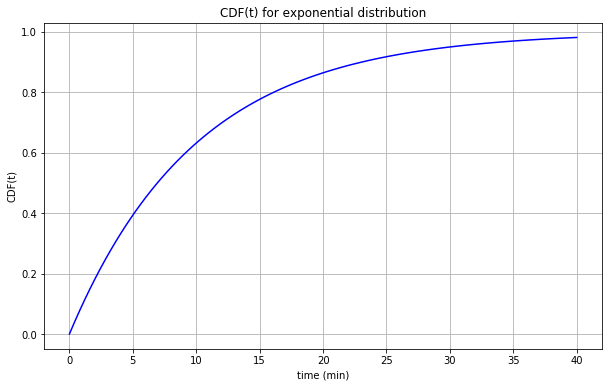

In [8]:
%matplotlib inline
import matplotlib.pyplot as pl
import matplotlib as mp
import numpy as np

t=np.linspace(0,40,100)
Tau=10.0

def CDF(t):
    return 1-np.exp(-t/Tau)

pl.figure(figsize=(10,6))
pl.plot(t, CDF(t), 'b-')
pl.title("CDF(t) for exponential distribution")
pl.xlabel("time (min)")
pl.ylabel("CDF(t)")
pl.grid()

Now suppose we sprinke fairy dust uniformly along the vertical axis of this graph. For each speck of dust we can reverse map to the time axis like so:

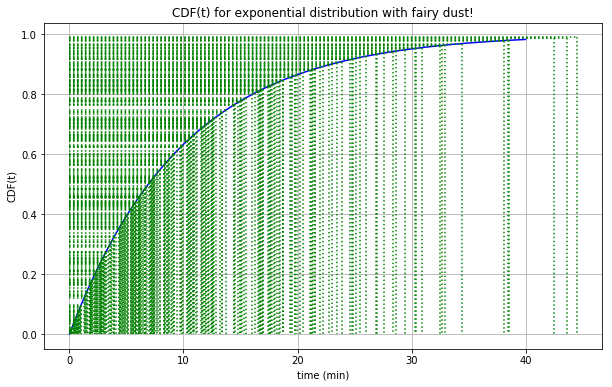

In [24]:
N=300 # how many specks of dust?

#
# set up some functions to compute the CDF and inverse CDF
# Don't worry too much about this for the moment, but just focus on the picture.
# Later you can come back and figure out how it works if you like.
#

fdusts = np.random.rand(N) # these are our fairy dust specs
rev = lambda r: -Tau*np.log(1.0-r)
cdf = lambda t: 1.0 - np.exp(-t/Tau)

pl.figure(figsize=(10,6))
pl.plot(t, CDF(t), 'b-')
pl.title("CDF(t) for exponential distribution with fairy dust!")
pl.xlabel("time (min)")
pl.ylabel("CDF(t)")
pl.grid()
currentAxis = pl.gca()
for yval in fdusts:
    xval=rev(yval)
    pl.plot([0,xval],[yval,yval],'g:')
    pl.plot([xval,xval],[yval,0],'g:')


Note that if we move the bits of fairy dust to the time axis by reverse mapping the y values from the CDF backwards to the corresponding times. For any given chunk of CDF range there there is a proporational number of bits of fairy dust on the time axis. What happens to the *density* of fairy dust on the "time" axis? Where is it most dense? Least? 

If you think about it for a bit, you'll see that the fairy dust piles up on the time axis with a density that is proportional to the *slope* of the CDF. For any given "$\Delta t$" the amount of "$\Delta P$" (fairy dust) is equal to:

$$ \Delta P = \left(\frac{d(CDF(t))}{dt}\right) \Delta t $$

But what is this derivative? Think about it. ;-) Yes, it's nothing other than the $PDF(t)$!

So by following this recipe, (back mapping a random number between 0 and 1 through the CDF) we get a distribution of *times* that is distributed exactly as the PDF requires.

# Simple Recipe for RNGs

1) Start with the PDF, and find the CDF

$$\text{CDF(t) = Probability (random var is between $-\infty$ and $t$)} = \int_{-\infty}^{t} P(t')\,dt'$$

2) Solve the following equation for $t$:

$$ r = CDF(t);\ \ \ \ \ \ (Eq 1)$$

where $r$ is a uniformly distributed random number between 0 and 1.

3) Use the values of $t$ as the random variable.

Of course, this only works if you can actually *solve* for $t$ in ${\rm Eq.}\ 1$.

# An example: The Exponential Distribution

Let's try this with the exponentail distribution where we already know the CDF:

$$ CDF(t) = 1.0 - e^{-t/\tau} $$

For step 2:

$$ r = 1.0 - e^{-t/\tau}$$

so:

$$ e^{-t/\tau} = 1.0 - r $$

$$ -\frac{t}{\tau} = \ln(1.0-r) $$

$$ t = - \tau \ln(1.0-r) $$

OK! So we can generate a bunch ($N$) of 'r' numbers and transform them into a bunch of exponentially distributed values of 't' according to the exponential PDf. Let's try it!

Text(0,0.5,'Number (out of 10000)')

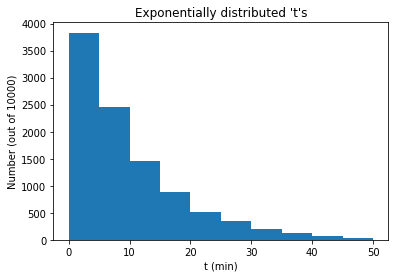

In [39]:

N=10000 # how many random numbers to generate?

r = np.random.rand(N)
t = -Tau*np.log(1.0-r)

pl.hist(t, bins=np.linspace(0,50,11))
pl.title("Exponentially distributed 't's")
pl.xlabel("t (min)")
pl.ylabel("Number (out of %d)" % N)


Once you have this distribution you can begin to ask other kinds of interesting questions. For example, suppose we wanted to estimate the chances of seeing 4 or more defects in less than 10 minutes. Or, we need to estimate how big of a backlog we're likely to see by the end of the day if our defect rate when up by 10% for 3 hours? These are questions that might be tricky to handle analytically, but can easily be simulated using RNGs.

# Exercises:

1) Using the example above estimate the chances of seeing 4 or more defects in less than 10 minutes.

2) Suppose you're running a production line 8 hours/day. Suppose you can handle a defect rate of 1 per 10 minutes on the average (6 defects per hour). At the end of 8 hours, what's the expected number of defects unhandled by th end of the day? What if the defect rate goes up by 10% for the last three hours?

